<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/random_forest_sensus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción del income del censo

## Cargando las librerías y los datasets
Vamos a preparar estos 2 conjuntos de datos, uno son los datos de entrenamiento y el otro de test.

In [16]:
import pandas as pd

# Nombres de columnas proporcionados
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]

# Cargar los datos desde los archivos
data = pd.read_csv('/content/drive/MyDrive/adult_data.csv', names=column_names)
test_data = pd.read_csv('/content/drive/MyDrive/adult_test.csv', names=column_names)



In [17]:
# Mostrar las primeras filas de cada dataframe para verificar
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [19]:
# Borrando la primera fila de test_data ya que no tiene nada que ver con los datos
test_data = test_data.iloc[1:]
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


## Revisión de Tipos de Datos y Valores Faltantes

### Llenando los valores faltantes en las columnas 'workclass', 'occupation' y 'native_country'

Se procede a llenar los valores faltantes con 'N/A'

In [20]:
# Llenar valores faltantes en las columnas especificadas con 'N/A'
columns_to_fill = ['workclass', 'occupation', 'native_country']

for column in columns_to_fill:
    data[column].fillna('N/A', inplace=True)
    test_data[column].fillna('N/A', inplace=True)

### Verificando valores faltantes en ambos datasets

In [21]:
missing_values = data.isna().sum()
missing_values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [22]:
missing_values_test = test_data.isna().sum()
missing_values_test

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Realizando una codificación 'one-hot' para las variables categóricas 'sex' e 'income' en el dataset de train

In [23]:
# Codificación 'one-hot' para 'sex'
data['sex'] = data['sex'].map({' Male': 1, ' Female': 0})

# Codificación 'one-hot' para 'income'
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1})

# Verificar los cambios realizados
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


### Realizando una codificación 'one-hot' para las variables categóricas 'sex' e 'income' en el dataset de test

In [24]:
# Codificación 'one-hot' para 'sex'
test_data['sex'] = test_data['sex'].map({' Male': 1, ' Female': 0})

# Codificación 'one-hot' para 'income', incluyendo las variaciones en test_data
test_data['income'] = test_data['income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})

# Verificar los cambios realizados
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,1,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,1,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,1,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688.0,0.0,40.0,United-States,1
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,0,0.0,0.0,30.0,United-States,0


## Análisis de la variables continuas en el dataset de entrenamiento

### Mapa de calor

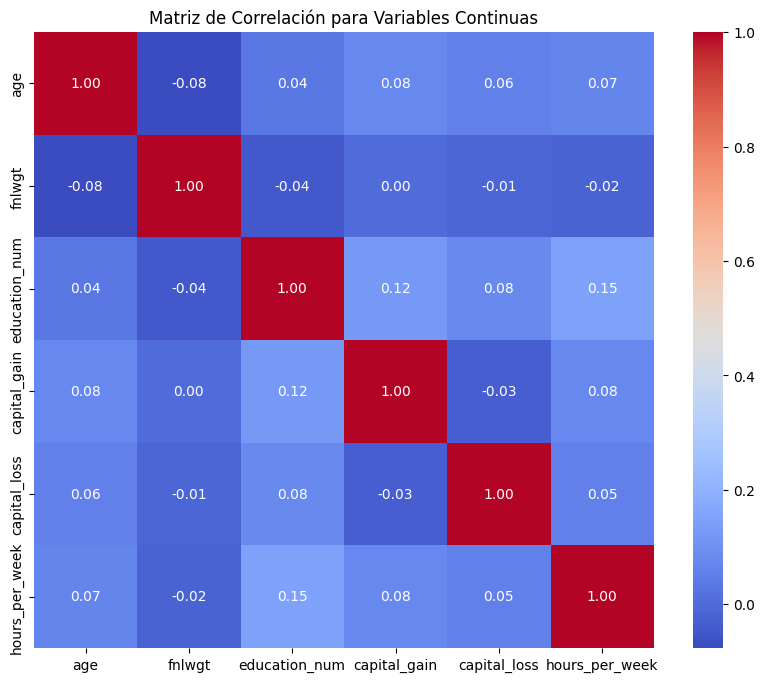

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas con variables continuas
continuous_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
continuous_data = data[continuous_columns]

# Crear la matriz de correlación
corr_matrix = continuous_data.corr()

# Generar un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Variables Continuas')
plt.show()

Cada celda proporciona el coeficiente de correlación entre dos variables, lo cual indica cómo una variable está relacionada linealmente con otra. Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente, mientras que los valores cerca de 0 indican una correlación débil.

### Gráficas de caja

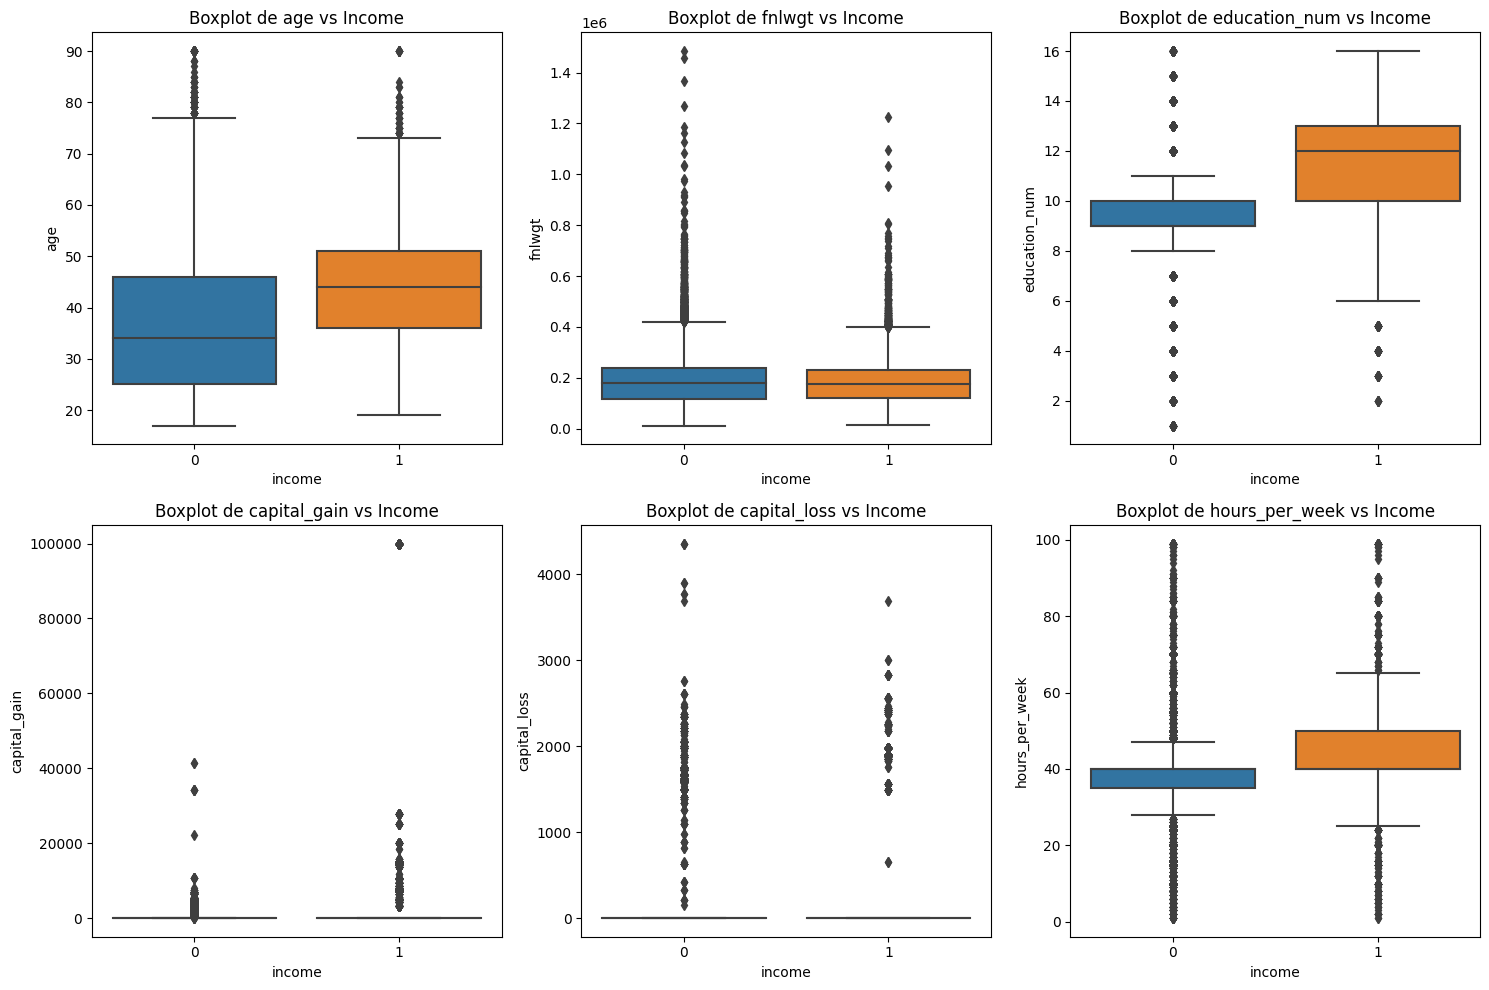

In [26]:
# Crear gráficos de caja (Boxplots) para las variables numéricas comparadas con 'income'
plt.figure(figsize=(15, 10))

for index, column in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, index)
    sns.boxplot(x='income', y=column, data=data)
    plt.title(f'Boxplot de {column} vs Income')

plt.tight_layout()
plt.show()

Estos gráficos proporcionan una buena visualización de cómo se distribuyen las variables numéricas ('age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week') entre los diferentes niveles de ingreso (0 para '<=50K' y 1 para '>50K').

Los gráficos de caja muestran la mediana (línea dentro del cuadro), los cuartiles (bordes del cuadro) y los valores atípicos (puntos fuera de las líneas de extensión), lo cual es útil para entender las diferencias en la distribución de estas variables en relación con los niveles de ingreso.

### Gráficas de barra

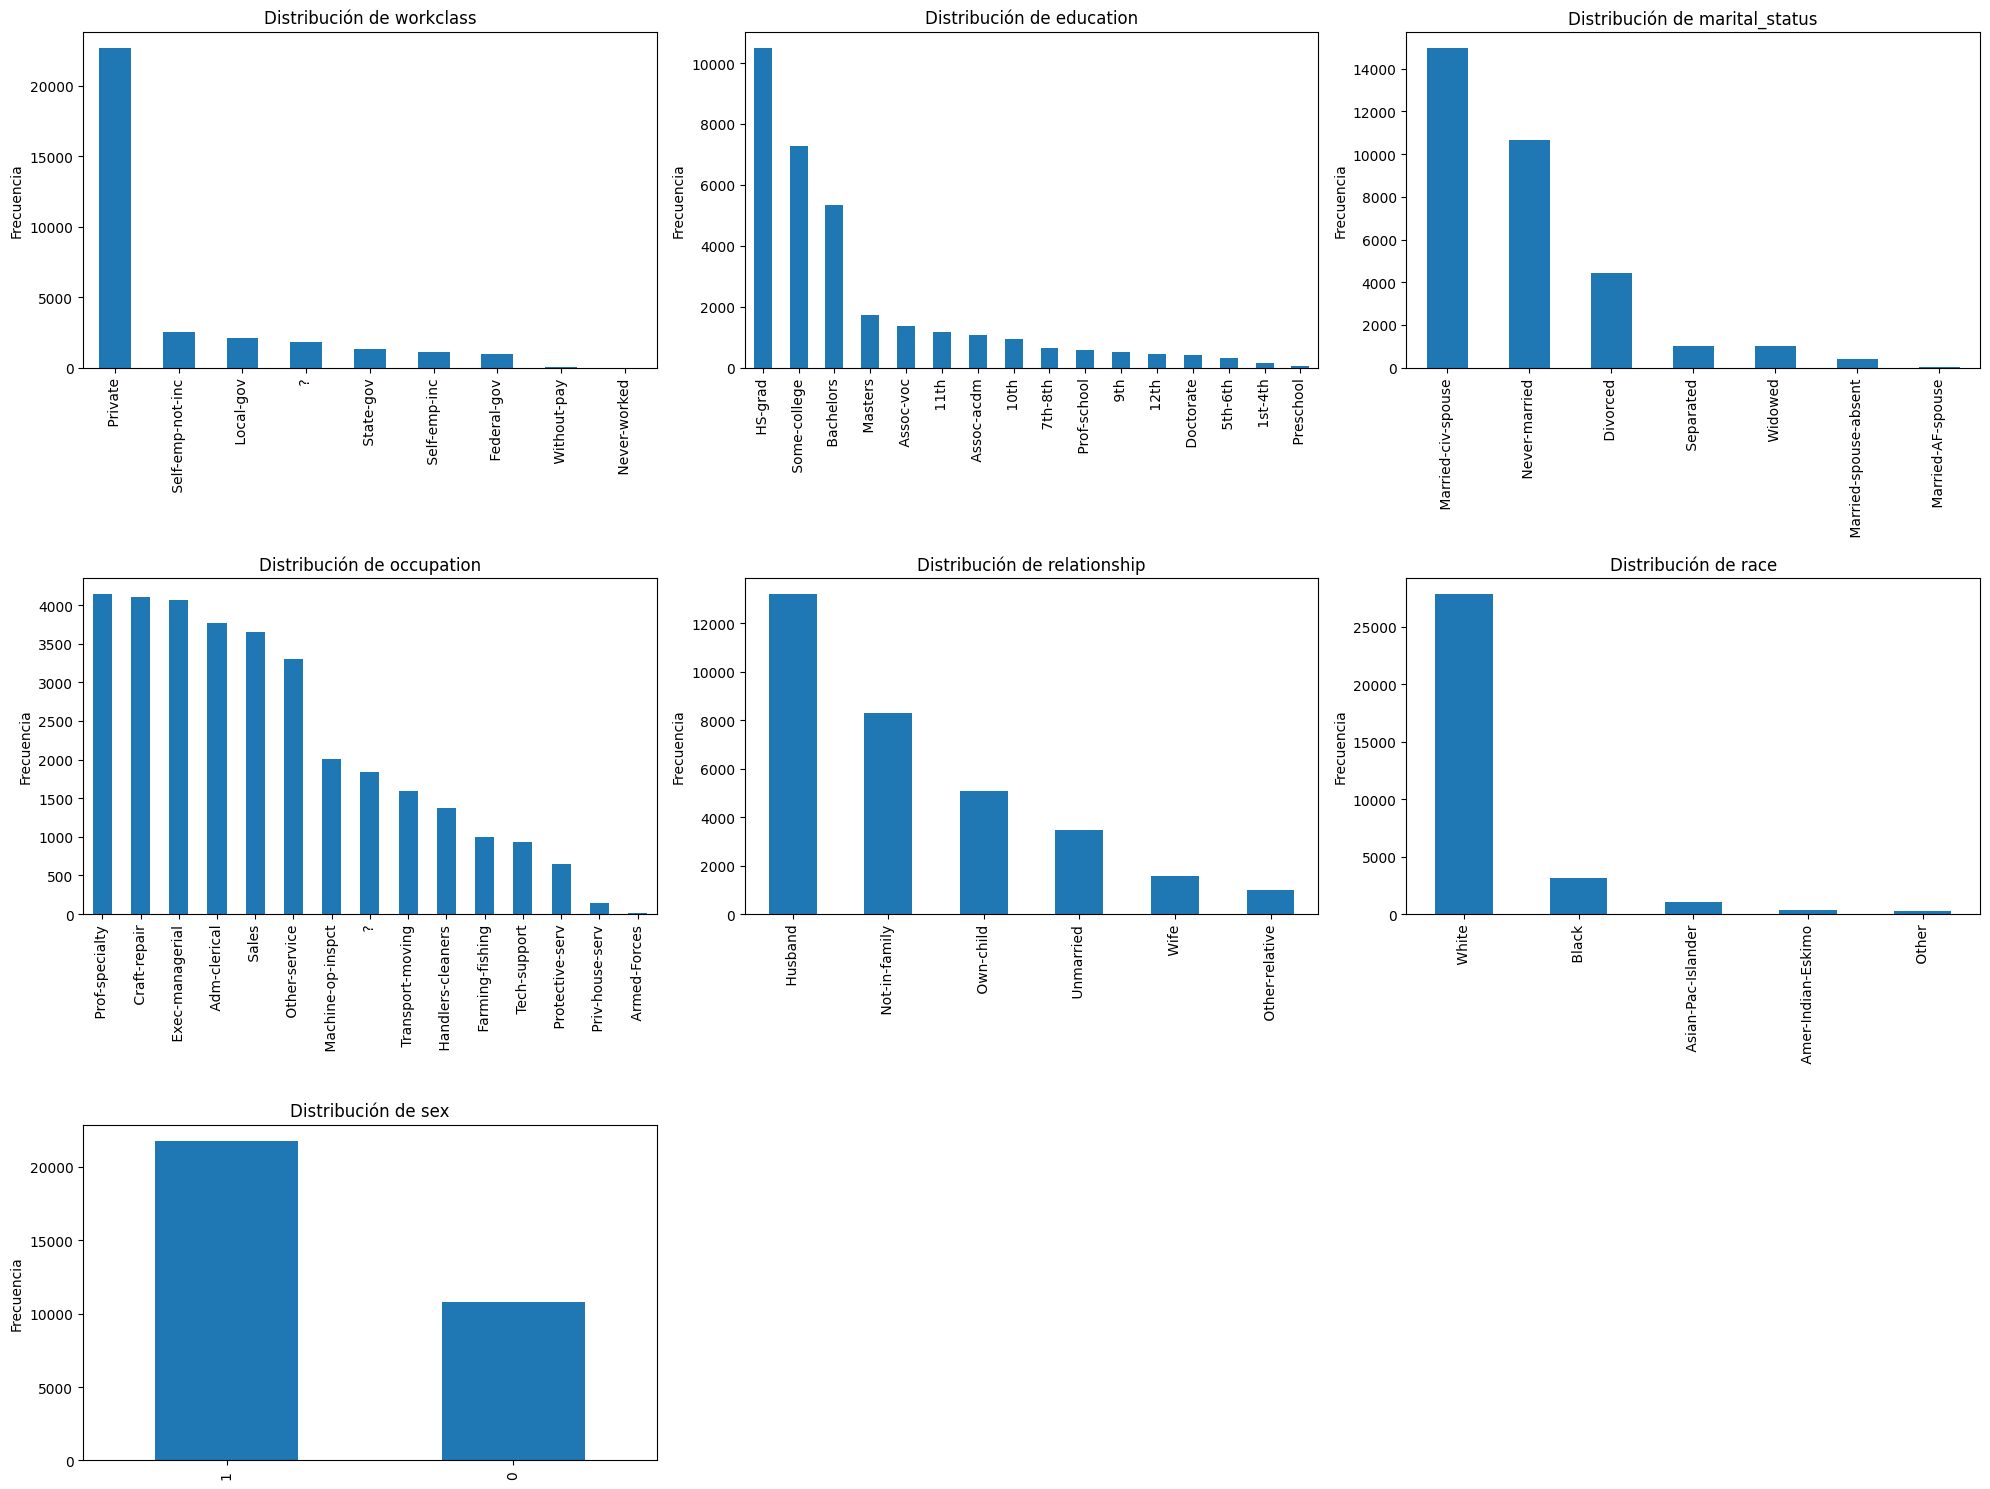

In [ ]:
# Seleccionar algunas variables categóricas representativas
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex']

# Crear gráficos de barras para las variables categóricas seleccionadas
plt.figure(figsize=(20, 15))

for index, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, index)
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {column}')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Estos gráficos muestran la distribución de frecuencias para cada categoría dentro de las variables 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race' y 'sex'.

Estos gráficos son útiles para comprender la composición del conjunto de datos en términos de estas variables categóricas, mostrando cuántas observaciones hay para cada categoría.

# Random Forest
En este caso, utilizaremos el conjunto de datos data para entrenar el modelo Random Forest y luego lo evaluaremos con el conjunto test_data. No será necesario dividir el conjunto data en subconjuntos de entrenamiento y validación, ya que ya disponemos de un conjunto de datos de prueba separado.

## Entrenamiento del Modelo

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Paso 1: Preparación de los Datos
# Identificando las columnas categóricas (todas las columnas excepto 'sex' y 'income' que ya están codificadas)
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Creando el transformador para la codificación 'one-hot'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creando el preprocesador que aplicará la transformación solo a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

# Paso 2: Separar Características y Variable Objetivo
X_train = data.drop('income', axis=1)
y_train = data['income']
X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

# Paso 3: Entrenar el Modelo
# Creando un pipeline que primero aplica el preprocesador y luego entrena el modelo
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42))])

# Entrenando el modelo
rf.fit(X_train, y_train)

# El modelo está entrenado. Pasaré al Paso 4 y 5 para probar y evaluar el modelo.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race',
                                                   'native_country'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=10,
                                        random_state=42))])

Para la evaluación, utilizaré métricas comunes como precisión, recall, y la puntuación F1. Además, calcularé el área bajo la curva ROC (AUC) para tener una mejor comprensión del rendimiento del modelo en términos de su capacidad para distinguir entre las clases.

In [29]:
from sklearn.metrics import classification_report, roc_auc_score

# Paso 4: Probar el Modelo
# Realizando predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Paso 5: Evaluar el Rendimiento
# Calculando métricas de evaluación
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

report, roc_auc

('              precision    recall  f1-score   support\n\n           0       0.81      0.97      0.88     12435\n           1       0.73      0.25      0.37      3846\n\n    accuracy                           0.80     16281\n   macro avg       0.77      0.61      0.63     16281\nweighted avg       0.79      0.80      0.76     16281\n',
 0.8562932553490319)

El modelo RandomForest ha sido probado y evaluado en el conjunto de datos de prueba. Aquí están los resultados de la evaluación:

**Informe de Clasificación**
* Precisión para la clase 0 (Ingresos <= 50K): 81%

* Recall para la clase 0: 97%

* F1-Score para la clase 0: 88%

* Precisión para la clase 1 (Ingresos > 50K): 73%

* Recall para la clase 1: 25%

* F1-Score para la clase 1: 37%

* Precisión general: 80%

**Área Bajo la Curva ROC (AUC)**

* AUC: 0.856

Estos resultados muestran que el modelo es bastante bueno para predecir la clase 0 (ingresos <= 50K), con una alta precisión y recall. Sin embargo, para la clase 1 (ingresos > 50K), aunque la precisión es razonablemente alta, el recall es bastante bajo, lo que indica que el modelo no es tan efectivo en identificar correctamente los casos de ingresos mayores a 50K.

La puntuación AUC de 0.856 es un indicador sólido de la capacidad general del modelo para distinguir entre las clases.

En este caso, una puntuación AUC de 0.856 indica que el modelo tiene una muy buena capacidad para distinguir entre las clases, situándose en un rango alto de efectividad. Esto es generalmente un indicador positivo del rendimiento del modelo en tareas de clasificación.